# MACHINE LEARNING CLASSIFICATION OF BRAIN STROKE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns of the dataframe
pd.set_option('display.expand_frame_repr', True) 

# Importing the dataset
df = pd.read_csv('brain_stroke_dataset.csv', skiprows=1, names=['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Ever_married', 'Work_type', 'Residence_type', 'Avg_glucose_level', 'Bmi', 'Smoking_status', 'Stroke'])

# Count number of sample and features
print(df.shape) 


(4981, 11)


## EDA - Exploratory Data Analysis

In [2]:
# Display the summary statistics of the dataframe, only for numerical columns
df.describe()  

,Age,Hypertension,Heart_disease,Avg_glucose_level,Bmi,Stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4981 non-null   object 
 1   Age                4981 non-null   float64
 2   Hypertension       4981 non-null   int64  
 3   Heart_disease      4981 non-null   int64  
 4   Ever_married       4981 non-null   object 
 5   Work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   Avg_glucose_level  4981 non-null   float64
 8   Bmi                4981 non-null   float64
 9   Smoking_status     4981 non-null   object 
 10  Stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### NaN Value

In [4]:
# Observe that there are not null value in the dataset
print(df.isnull().sum()) 


Gender               0
Age                  0
Hypertension         0
Heart_disease        0
Ever_married         0
Work_type            0
Residence_type       0
Avg_glucose_level    0
Bmi                  0
Smoking_status       0
Stroke               0
dtype: int64


### Unique Value

In [5]:
# Number of unique values in each feature
print("\nUnique values in the df: ")
print(df.nunique())


Unique values in the df: 
Gender                  2
Age                   104
Hypertension            2
Heart_disease           2
Ever_married            2
Work_type               4
Residence_type          2
Avg_glucose_level    3895
Bmi                   342
Smoking_status          4
Stroke                  2
dtype: int64


### Duplicate sample

In [6]:
print("The number of duplicated rows: ")
print(df.duplicated().sum())

The number of duplicated rows: 
0


### Gender

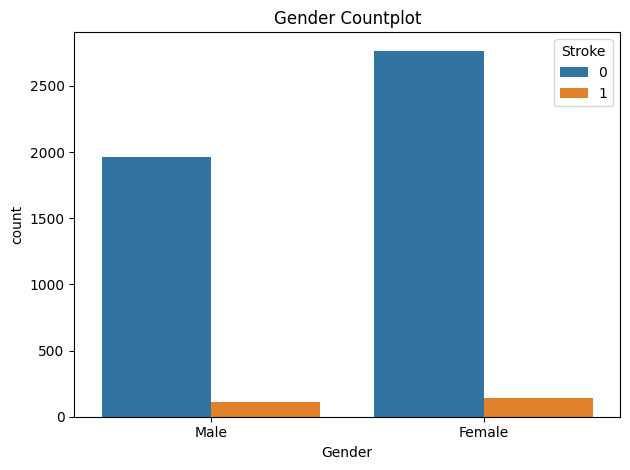

In [7]:
# Covert the categorical values to numerical values for gender
# df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Observe the gender distribution
sns.countplot(data=df, x='Gender', hue='Stroke').set_title('Gender Countplot')

plt.tight_layout()
plt.show()

### Age

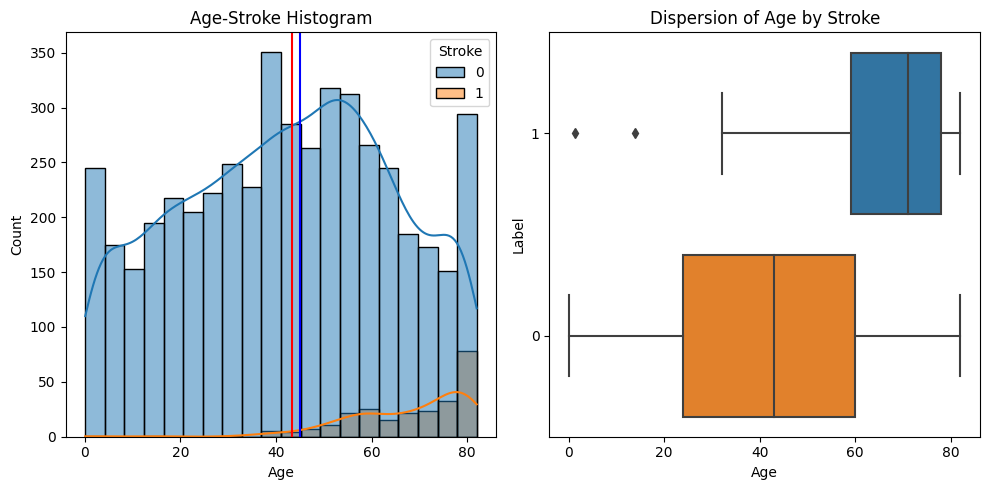

In [8]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Observe the stroke distribution compared to age before converting the age to 25 years interval 
sns.histplot(df, x='Age', hue='Stroke', ax=axs[0], kde=True).set(title='Age-Stroke Histogram')

axs[0].axvline(df['Age'].mean(), label='mean', color='red')
axs[0].axvline(df['Age'].median(), label='median', color='blue')

df['Label'] = df['Stroke'].apply(str) # Convert the stroke to string (so a categoric variable) to plot the boxplot
sns.boxplot(df, x='Age', y='Label', ax=axs[1]).set(title='Dispersion of Age by Stroke') 

# # Convert the age in 25 years interval
# df['Age'] = pd.cut(df['Age'], bins=[0, 25, 50, 75, 100], labels=[0, 1, 2, 3])

# Observe the age distribution
# sns.countplot(df, x='Age', hue='Stroke', ax=axs[2]).set_title('Age Countplot')

plt.tight_layout()
plt.show()

### Hypertension


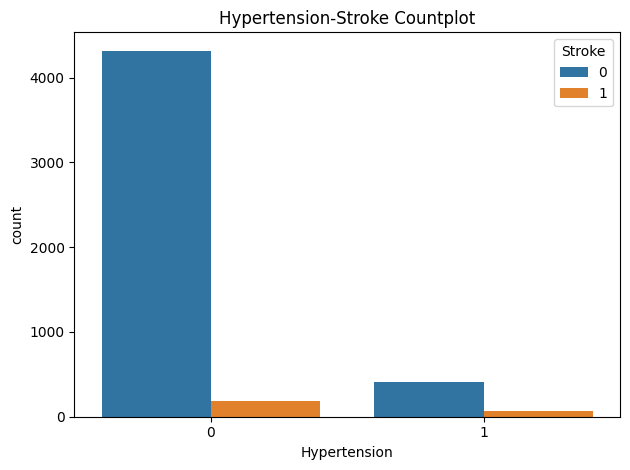

In [9]:
sns.countplot(data=df, x='Hypertension', hue='Stroke').set_title('Hypertension-Stroke Countplot')

plt.tight_layout()
plt.show()

### Heart Desease

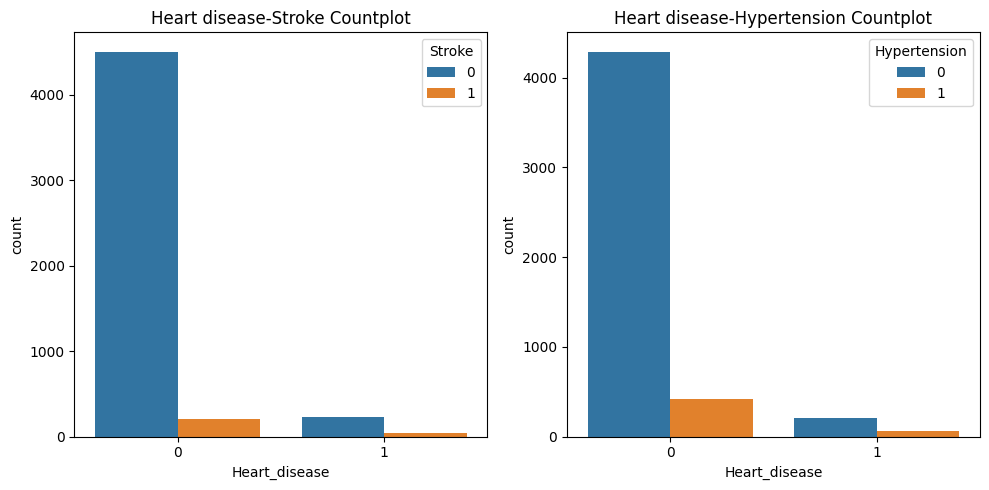

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df, x='Heart_disease', hue='Stroke', ax=axs[0]).set_title('Heart disease-Stroke Countplot')

sns.countplot(data=df, x='Heart_disease', hue='Hypertension', ax=axs[1]).set_title('Heart disease-Hypertension Countplot')

plt.tight_layout()
plt.show()

### Ever Married

Text(0.5, 1.0, 'Ever Married-Stroke Countplot')

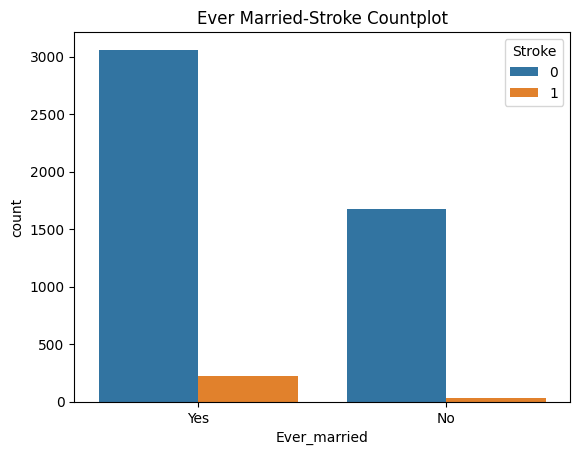

In [11]:
# Covert the categorical values to numerical values for ever_married
# df['Ever_married'] = df['Ever_married'].replace({'No': 0, 'Yes': 1}) # 0: Ever Married, 1: Married at least once

# Observe the stroke distribution compared to ever_married
sns.countplot(df, x='Ever_married', hue='Stroke').set_title('Ever Married-Stroke Countplot') 


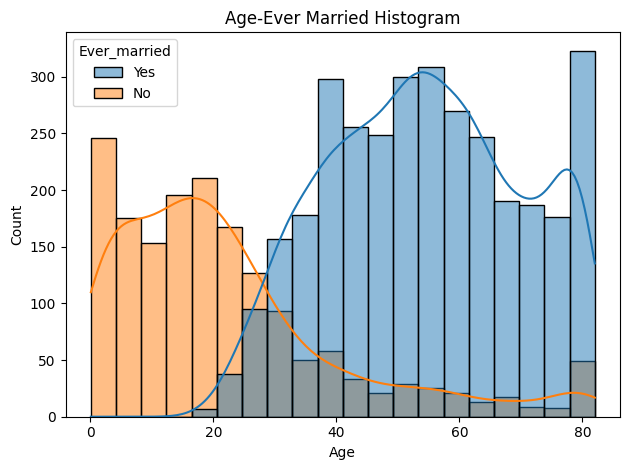

In [12]:
# Checking the ever married status by age
sns.histplot(df, x='Age', hue='Ever_married', kde=True).set_title('Age-Ever Married Histogram')
plt.tight_layout()
plt.show()

### Work Type

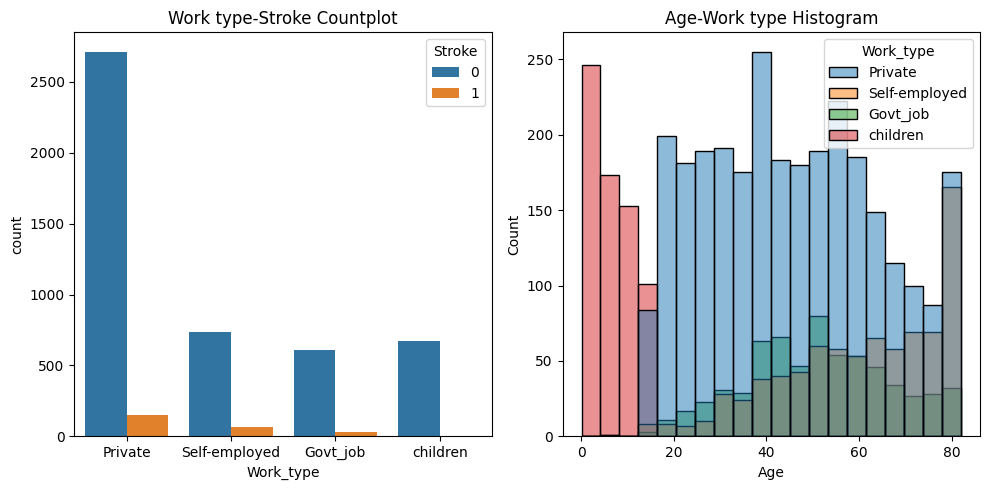

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df, x='Work_type', hue='Stroke', ax=axs[0]).set_title('Work type-Stroke Countplot')

sns.histplot(df, x='Age', hue='Work_type', ax=axs[1]).set(title='Age-Work type Histogram')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Work type-Heart Disease Countplot')

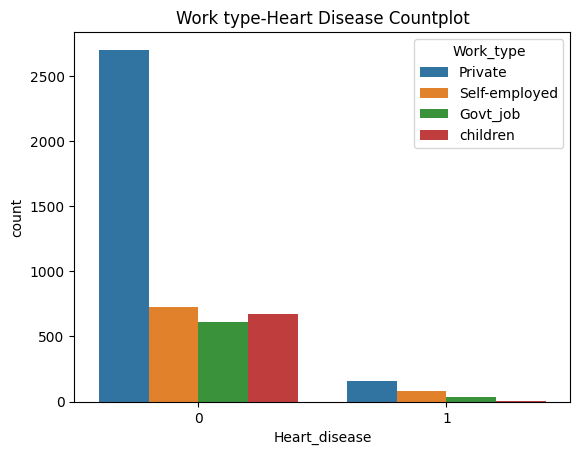

In [14]:
sns.countplot(data=df, x='Heart_disease', hue='Work_type').set_title('Work type-Heart Disease Countplot')

### Resident type
 

Text(0.5, 1.0, 'Resident type Countplot')

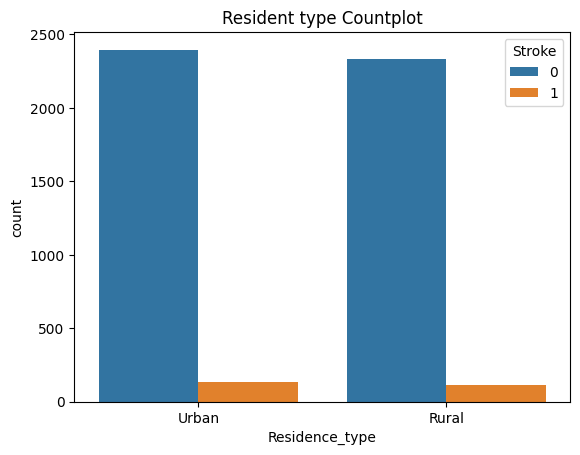

In [15]:
# Covert the categorical values to numerical values for residence_type
# df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})  

# Observe the stroke distribution compared to ever_married
sns.countplot(df, x='Residence_type', hue='Stroke').set_title('Resident type Countplot') 

### Avg Glucose Level

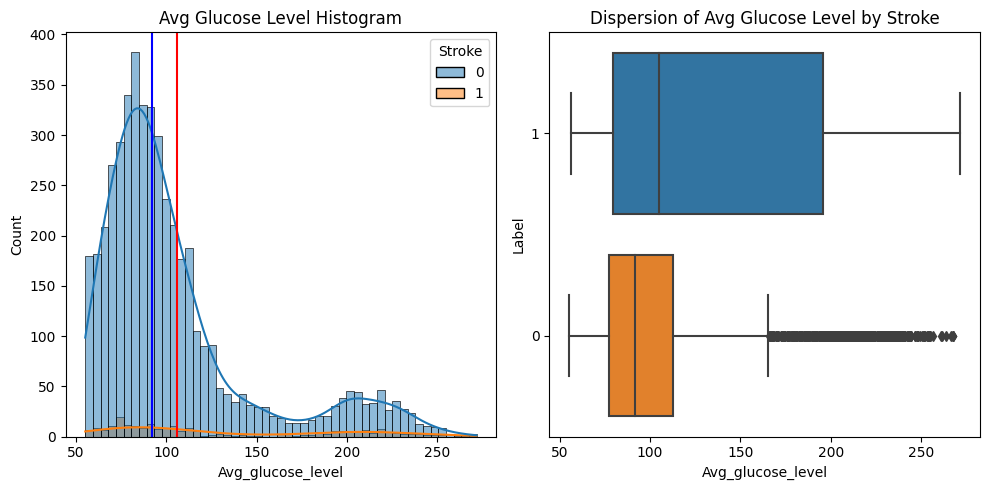

In [16]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Observe the stroke distribution compared to age before converting the age to 25 years interval 
sns.histplot(df, x='Avg_glucose_level', hue='Stroke', ax=axs[0], kde=True).set_title('Avg Glucose Level Histogram')

axs[0].axvline(df['Avg_glucose_level'].mean(), label='mean', color='red')
axs[0].axvline(df['Avg_glucose_level'].median(), label='median', color='blue')

# Checking for average glucose level
sns.boxplot(df, x='Avg_glucose_level', y='Label', ax=axs[1]).set_title('Dispersion of Avg Glucose Level by Stroke')

plt.tight_layout() 
plt.show()

In [17]:
# def check_glucose(cols):
#     avg_glucose_level = cols[0]

#     if avg_glucose_level < 60:
#         return 0  # Hypoglycemic
#     if 60 <= avg_glucose_level < 140:
#         return 1  # Normal
#     if 140 <= avg_glucose_level < 200:
#         return 2  # Pre-Diabetic
#     if avg_glucose_level >= 200:
#         return 3 # Diabetic

# df['Avg_glucose_level'] = df[['Avg_glucose_level']].apply(check_glucose, axis=1)

# # Observe the stroke distribution compared to ever_married
# sns.countplot(df, x='Avg_glucose_level', hue='Stroke').set(title='Avg_glucose_level Countplot') 



### BMI

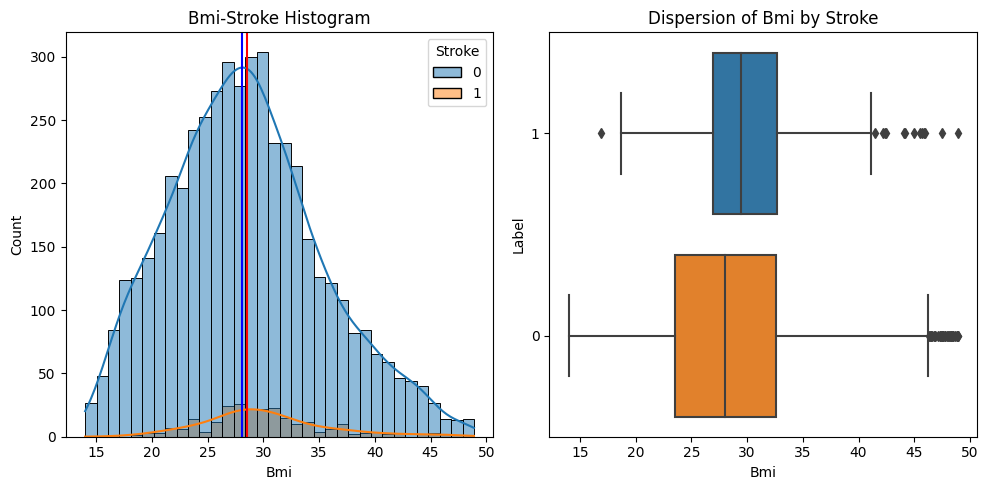

In [18]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Observe the stroke distribution compared to age before converting the age to 25 years interval 
sns.histplot(df, x='Bmi', hue='Stroke', ax=axs[0], kde=True).set(title='Bmi-Stroke Histogram')

axs[0].axvline(df['Bmi'].mean(), label='mean', color='red')
axs[0].axvline(df['Bmi'].median(), label='median', color='blue')

# Checking for average glucose level
sns.boxplot(df, x='Bmi', y='Label', ax=axs[1]).set(title='Dispersion of Bmi by Stroke')

plt.tight_layout() 
plt.show()

In [19]:
# def check_bmi(cols):
#     bmi = cols[0]

#     if bmi < 18.5:
#         return 0  # Underweight
#     if 18.5 <= bmi < 25:
#         return 1  # Normal
#     if 25 <= bmi < 30:
#         return 2  # Overweight
#     if bmi >= 30:
#         return 3  # Obese

# df['Bmi'] = df[['Bmi']].apply(check_bmi, axis=1)


# Create a figure and a set of subplots
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sns.countplot(data=df, x="Bmi", hue="Stroke", ax=axs[0]).set(title='Bmi-Stroke Countplot')

# sns.countplot(data=df, x="Bmi", hue="Avg_glucose_level", ax=axs[1]).set(title='Bmi-Avg_glucose_level Countplot')

# plt.legend(loc='upper left')

# plt.tight_layout() 
# plt.show()

### Smoking Status

[Text(0.5, 1.0, 'Bmi-Stroke Histogram')]

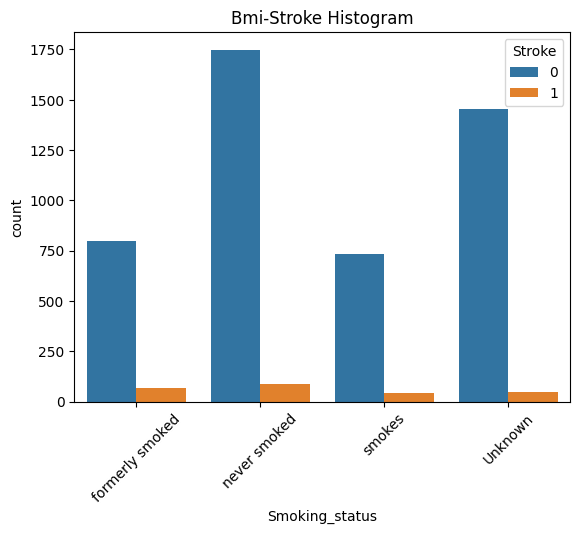

In [20]:
plt.xticks(rotation=45)
# Observe the stroke distribution compared to age before converting the age to 25 years interval 
sns.countplot(df, x='Smoking_status', hue='Stroke').set(title='Bmi-Stroke Histogram')


[Text(0.5, 1.0, 'Bmi-Stroke Histogram')]

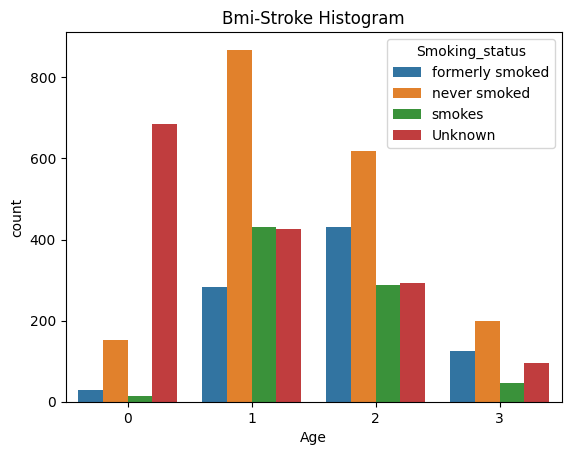

In [21]:
# Copy the dataframe to avoid modifying the original dataframe
temp_df = df.copy() 

temp_df['Age'] = pd.cut(temp_df['Age'], bins=[0, 18, 50, 75, 100], labels=[0, 1, 2, 3])
sns.countplot(temp_df, x='Age', hue='Smoking_status').set(title='Bmi-Stroke Histogram')

### Pairplot

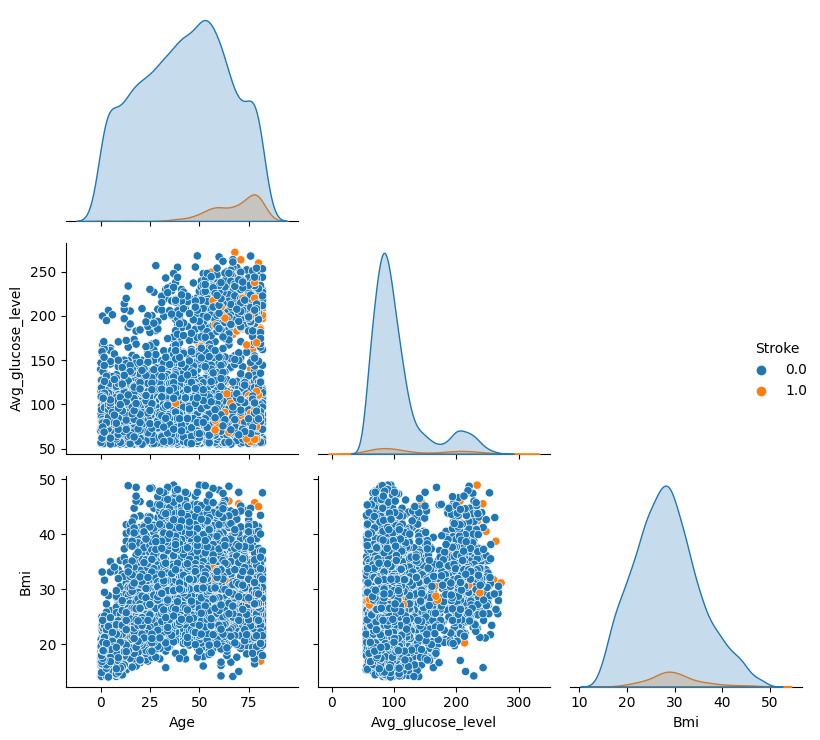

In [22]:
df_float = df.copy()
df_float['Stroke'] = df_float['Stroke'].astype(float)

sns.pairplot(df_float.select_dtypes('float'), hue='Stroke', corner=True)
plt.tight_layout()
plt.show()

## Feature Engeenering

In [23]:
# Drop the Label column that we created for visualization of the boxplot
df.drop('Label', axis=1, inplace=True)

# Covert the categorical values to numerical values for gender
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

# Covert the categorical values to numerical values for ever_married
df['Ever_married'] = df['Ever_married'].replace({'No': 0, 'Yes': 1}) # 0: Ever Married, 1: Married at least once

# Covert the categorical values to numerical values for residence_type
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

# One-hot encoding for work_type
df = pd.get_dummies(df, columns=['Work_type']) 

# Rename the columns
df.rename(columns={'Work_type_Govt_job':'Govt_job', 'Work_type_Private': 'Private', 'Work_type_Self-employed': 'Self_employed', 'Work_type_children': 'Children'}, inplace=True)

df.head()


,Gender,Age,Hypertension,Heart_disease,Ever_married,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke,Govt_job,Private,Self_employed,Children
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1,0,1,0,0


### KNN to replace the values unkown_smokes

In [24]:
# from sklearn.neighbors import KNeighborsClassifier

# # Funzione per calcolare la distanza di Gower
# def gower_distance(X1, X2):
#     numerical_features = [1, 6, 7]  # Indici delle colonne numeriche (Age, Avg_glucose_level, Bmi)
#     categorical_features = [0, 2, 3, 4, 5, 8, 9, 10, 11, 12]  # Indici delle colonne categoriche

#     ranges = np.ptp(X1, axis=0)  # Range delle feature numeriche
#     max_range = np.max(ranges[numerical_features])
    
#     # Calcolo della distanza di Gower per ciascuna coppia di campioni
#     distance_matrix = np.zeros((X1.shape[0], X2.shape[0]))
#     for i, xi in enumerate(X1):
#         for j, xj in enumerate(X2):
#             numerators = np.sum(np.abs(xi[numerical_features] - xj[numerical_features]) / max_range)
#             categorical_matches = np.sum(xi[categorical_features] == xj[categorical_features])
#             distance_matrix[i, j] = (numerators + (1 - categorical_matches / len(categorical_features))) / (len(numerical_features) + 1)
#     return distance_matrix

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sns.countplot(df, x='Smoking_status', hue='Stroke', ax=axs[0]).set(title='Smoking_status-Stroke Pre-KNN')

# # Dividi il dataset in due parti: una con valori noti e una con valori mancanti di Smoking_status
# known_smoking_status = df[df['Smoking_status'] != 'Unknown']
# unknown_smoking_status = df[df['Smoking_status'] == 'Unknown']

# # Seleziona le colonne da utilizzare per l'addestramento del modello K-NN
# features = ['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Ever_married', 'Residence_type', 'Avg_glucose_level', 'Bmi', 'Stroke', 'Govt_job', 'Private', 'Self_employed', 'Children']
# X_train_for_smoker = known_smoking_status[features]
# y_train_for_smoker = known_smoking_status['Smoking_status']

# # Calcola la matrice delle distanze di Gower per i dati noti
# gower_dist_matrix = gower_distance(X_train_for_smoker.values, X_train_for_smoker.values)

# # Crea e addestra il modello K-NN
# knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='brute', weights='distance', metric='precomputed')
# knn_model.fit(gower_dist_matrix, y_train_for_smoker)

# # Calcola la matrice delle distanze di Gower per i dati di predizione (Unknown)
# X_pred = unknown_smoking_status[features]
# gower_dist_matrix_pred = gower_distance(X_pred.values, X_train_for_smoker.values)

# # Utilizza il modello addestrato per predire i valori mancanti
# predicted_smoking_status = knn_model.predict(gower_dist_matrix_pred) 

# # Assegna le previsioni ai valori mancanti nella colonna "Smoking_status"
# df.loc[df['Smoking_status'] == 'Unknown', 'Smoking_status'] = predicted_smoking_status

# plt.xticks(rotation=45)
# # Observe the stroke distribution compared to age before converting the age to 25 years interval 
# sns.countplot(df, x='Smoking_status', hue='Stroke', ax=axs[1]).set(title='Smoking_status-Stroke Post-KNN')

# plt.show()


[Text(0.5, 1.0, 'Smoking_status-Stroke Post-KNN')]

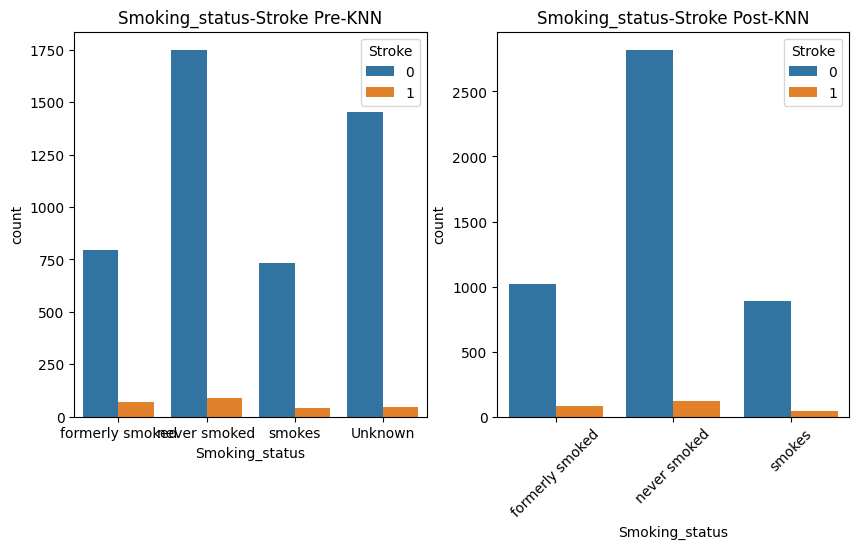

In [25]:
from sklearn.neighbors import KNeighborsClassifier

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plt.xticks(rotation=45)
sns.countplot(df, x='Smoking_status', hue='Stroke', ax=axs[0]).set(title='Smoking_status-Stroke Pre-KNN')

# Dividi il dataset in due parti: una con valori noti e una con valori mancanti di Smoking_status
known_smoking_status = df[df['Smoking_status'] != 'Unknown']
unknown_smoking_status = df[df['Smoking_status'] == 'Unknown']

# Seleziona le colonne da utilizzare per l'addestramento del modello K-NN
features = ['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Ever_married', 'Residence_type',	'Avg_glucose_level', 'Bmi', 'Stroke', 'Govt_job', 'Private', 'Self_employed', 'Children', ]

X_train_for_smoker = known_smoking_status[features]
y_train_for_smoker = known_smoking_status['Smoking_status']

# Normalizza i dati 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_for_smoker) # Calculate the mean and standard deviation of the training set and then apply the transformation to the training set

# Crea e addestra il modello K-NN
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='auto', weights='distance', metric='manhattan')
knn_model.fit(X_train_for_smoker, y_train_for_smoker)

# Utilizza il modello addestrato per predire i valori mancanti
X_pred = unknown_smoking_status[features]
predicted_smoking_status = knn_model.predict(X_pred) 

# Assegna le previsioni ai valori mancanti nella colonna "Smoking_status"
df.loc[df['Smoking_status'] == 'Unknown', 'Smoking_status'] = predicted_smoking_status

plt.xticks(rotation=45)
sns.countplot(df, x='Smoking_status', hue='Stroke', ax=axs[1]).set(title='Smoking_status-Stroke Post-KNN')


In [26]:
# Handling the categorical features
df = pd.get_dummies(df, columns=['Smoking_status'])  

df.rename(columns={'Smoking_status_formerly smoked' : 'Formerly_smoked', 'Smoking_status_never smoked' : 'Never_smoked', 'Smoking_status_smokes': 'Smokes'}, inplace=True)

df.head()   

,Gender,Age,Hypertension,Heart_disease,Ever_married,Residence_type,Avg_glucose_level,Bmi,Stroke,Govt_job,Private,Self_employed,Children,Formerly_smoked,Never_smoked,Smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0


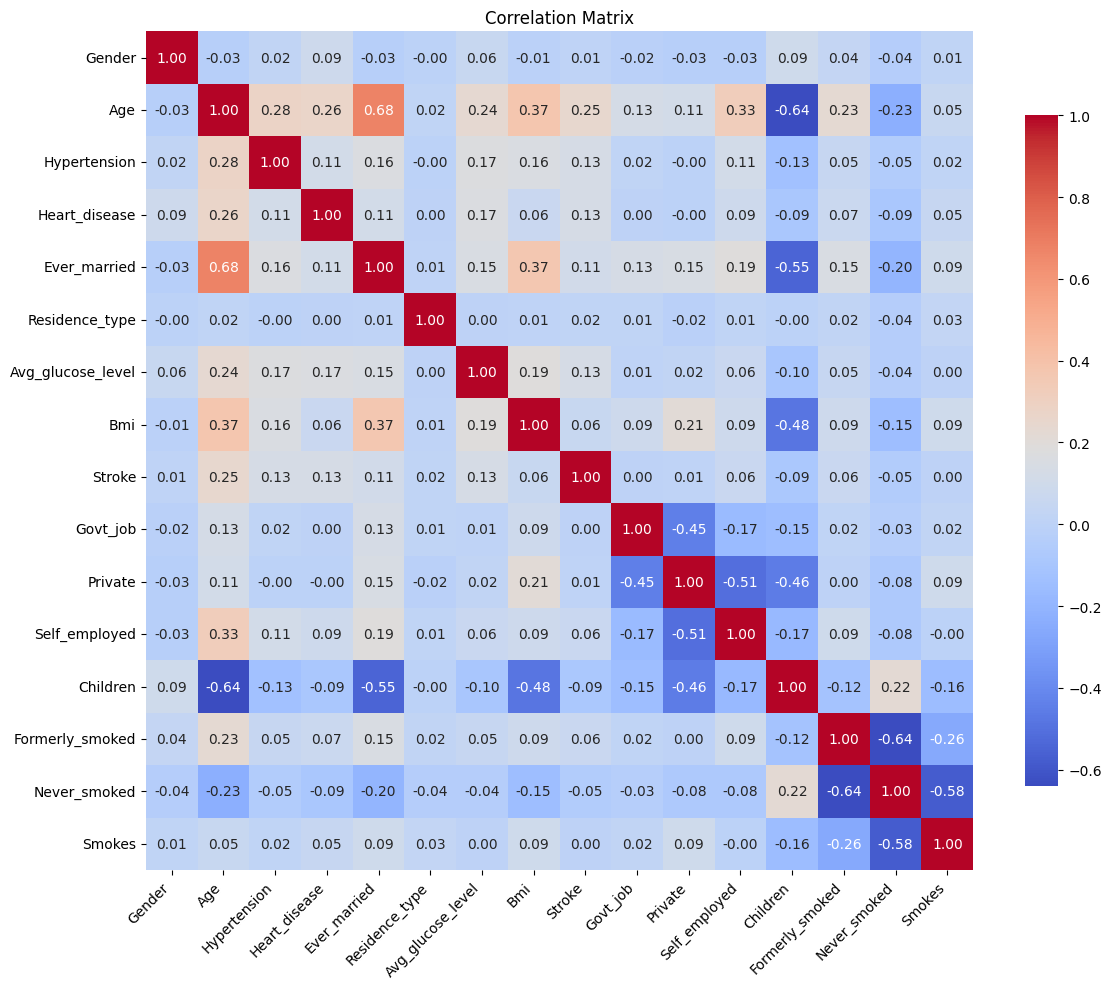

In [27]:
# Correlation Matrix. 
corr_matrix = df.corr()

from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))  # Aumenta la dimensione della figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 10}, cmap="coolwarm", 
            xticklabels=1, yticklabels=1, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right')  # Ruota le etichette dell'asse x
plt.yticks(rotation=0)  # Mantiene le etichette dell'asse y orizzontali
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


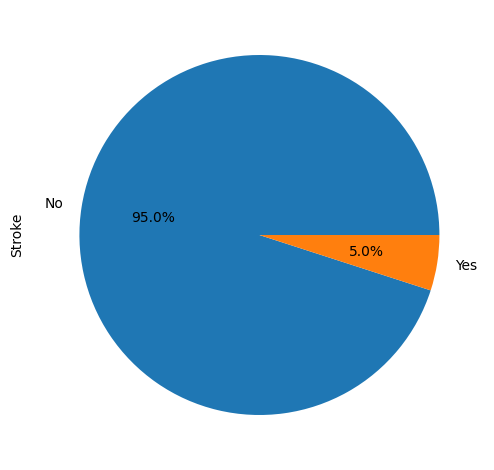

In [28]:
# Percentage of feature target "stroke".
figure = (df["Stroke"].value_counts() * 100.0 / len(df)).plot.pie(autopct='%.1f%%', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

## Model Selection

### Split and Normalize the dataset in train and test

In [64]:
# Prepare the dataset for the model
X = df.drop('Stroke', axis=1)  # Features
y = df['Stroke']  # Label

from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
# 80% training and 20% test
# straitify=y to keep the same proportion of the target variable in the train and test set
# random_state=0 to keep the same split each time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) 


# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train) # Calculate the minimum and maximum of the training set and then apply the transformation to the training set
X_test = sc.transform(X_test)       # Apply the transformation to the test set using the minimum and maximum of the training set


# Convertire i dati scalati in DataFrame per una visualizzazione più semplice
X_train_scaled_df = pd.DataFrame(X_train)
X_test_scaled_df = pd.DataFrame(X_test)

# Visualizzare i primi campioni dei dati scalati
print("Primi 5 campioni del set di addestramento scalato:")
print(X_train_scaled_df.head())

print("\nPrimi 5 campioni del set di test scalato:")
print(X_test_scaled_df.head())


Primi 5 campioni del set di addestramento scalato:
    0         1    2    3    4    5         6         7    8    9    10   11  \
0  0.0  0.315738  0.0  0.0  0.0  1.0  0.165403  0.704871  1.0  0.0  0.0  0.0   
1  1.0  0.621212  0.0  0.0  1.0  0.0  0.149395  0.315186  0.0  1.0  0.0  0.0   
2  1.0  0.584555  0.0  0.0  1.0  0.0  0.761147  0.564470  0.0  0.0  1.0  0.0   
3  1.0  0.474585  0.0  0.0  1.0  1.0  0.515326  0.567335  0.0  1.0  0.0  0.0   
4  1.0  1.000000  0.0  0.0  1.0  0.0  0.141579  0.372493  0.0  0.0  1.0  0.0   

    12   13   14  
0  0.0  1.0  0.0  
1  1.0  0.0  0.0  
2  0.0  0.0  1.0  
3  0.0  1.0  0.0  
4  0.0  1.0  0.0  

Primi 5 campioni del set di test scalato:
    0         1    2    3    4    5         6         7    8    9    10   11  \
0  1.0  0.621212  0.0  0.0  0.0  0.0  0.150337  0.355301  0.0  0.0  1.0  0.0   
1  1.0  0.804497  0.0  0.0  1.0  1.0  0.192900  0.696275  0.0  0.0  1.0  0.0   
2  1.0  0.877810  1.0  0.0  1.0  0.0  0.830971  0.550143  0.0  1.0  0.0

### KNN

In [30]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Define the hyperparameters range and estimator
k_values = range(1, 20)

hyper_parameters = {
    'n_neighbors': k_values,                            # Number of neighbors to use
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],     # Algorithm used to compute the nearest neighbors
    'p': [1,2],                                         # Power parameter of the distance metric (1: Manhattan, 2: Euclidean)
    'weights': ['uniform', 'distance']                  # Weight function used in prediction (uniform: all points in each neighborhood are weighted equally, distance: closer neighbors of a query point will have a greater influence than neighbors which are further away)
}

# Create a K-NN classifier for estimating the best hyperparameters
estimator = KNeighborsClassifier() # With the class_weight='balanced' parameter which automatically assigns higher weights to the minority class during training

# Create a GridSearchCV object for hyperparameter tuning
knn_cv = GridSearchCV(estimator, 
                      hyper_parameters, 
                      cv=5,             # Use 5 folds for cross validation
                      scoring='f1',     # Use F1 score as the metric for the cross validation process
                      n_jobs=-1,        # Use all processors to train the model
                      verbose = 10)     # Print the progress of the cross validation process
 

# Train the knn model using cross validation
knn_cv.fit(X_train, y_train)

print('GridSearch CV best score : {:.4f}'.format(knn_cv.best_score_))
print(f"Best paramenter: {knn_cv.best_params_}")

# Make predictions on the training set
y_hat_train = knn_cv.predict(X_train)

# Evaluate model performance on the training set
print(f"F1 Score on Training Set: {f1_score(y_train, y_hat_train)}")
print(f"Accuracy Score on Training Set: {accuracy_score(y_train, y_hat_train)}")
print(f"Classification Report on the Training Set:\n{classification_report(y_train, y_hat_train, zero_division=0)}")

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
GridSearch CV best score : 0.1033
Best paramenter: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
F1 Score on Training Set: 0.27586206896551724
Accuracy Score on Training Set: 0.9559484566976326
Classification Report on the Training Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3171
           1       0.76      0.17      0.28       166

    accuracy                           0.96      3337
   macro avg       0.86      0.58      0.63      3337
weighted avg       0.95      0.96      0.94      3337



Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
F1 Score on Test Set: 0.057142857142857134
Accuracy Score on Test Set: 0.9397810218978102
Classification Report on the Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1562
           1       0.13      0.04      0.06        82

    accuracy                           0.94      1644
   macro avg       0.54      0.51      0.51      1644
weighted avg       0.91      0.94      0.92      1644



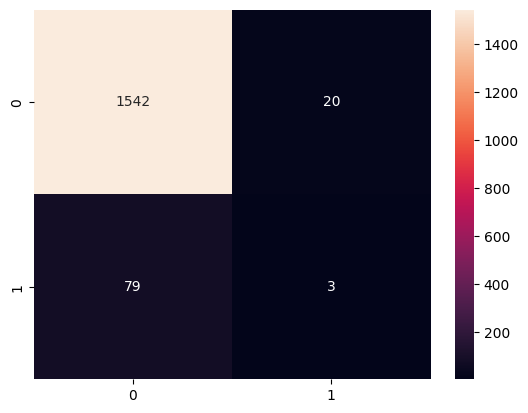

In [31]:
# Make predictions on the test set
y_hat_test = knn_cv.predict(X_test)

# Print best parameters found by GridSearchCV
print(f"Best parameters: {knn_cv.best_params_}")

# Evaluate model performance on the test set
print(f"F1 Score on Test Set: {f1_score(y_test, y_hat_test)}")
print(f"Accuracy Score on Test Set: {accuracy_score(y_test, y_hat_test)}")
print(f"Classification Report on the Test Set:\n{classification_report(y_test, y_hat_test, zero_division=0)}")

# Generate confusion matrix and visualize it
conf_matrix = confusion_matrix(y_test, y_hat_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

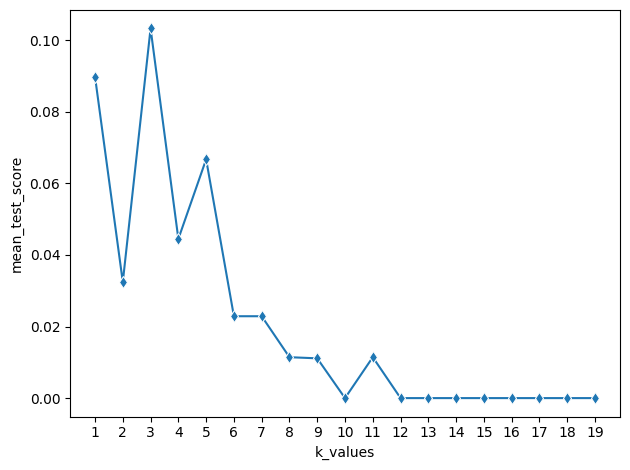

In [32]:
# Convert the results of the GridSearchCV to a DataFrame
scores = pd.DataFrame(knn_cv.cv_results_)  

# Create a new DataFrame to store the hyperparameters
ddf = pd.DataFrame(columns=['n_neighbors', 'p', 'weights', 'algorithm']) 

# Extract the hyperparameters from the 'params' column
for (i,r) in scores.iterrows():
    e = r['params']
    ddf.loc[i] = [e['n_neighbors'], e['p'], e['weights'], e['algorithm']]

# Concatenate the two dataframes
scores = pd.concat( [scores, ddf], axis=1)              
scores = scores[ scores['p'] == 1]                      # Select the scores with p = 1 
scores = scores[ scores['weights'] == 'uniform']        # Select the scores with weights = 'uniform'
scores = scores[ scores['algorithm'] == 'ball_tree']    # Select the scores with algorithm = 'ball_tree'
scores.mean_test_score

# Plot the F1 score for different values of k
sns.lineplot(x=k_values, y=scores.mean_test_score, marker='d') 
plt.xticks(k_values) # Set the x-ticks to be the k-values
plt.xlabel('k_values') # Set the x-label to be 'k-values'
plt.tight_layout()
plt.show()

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
estimator = LogisticRegression(max_iter=1000) 

# Create a GridSearchCV object for hyperparameter tuning
hyper_parameters = [
    {
        'C': np.logspace(-3, 3, 20),   # C=1/lambda, regularization parameter, sequence uniform distributed beteween 10^-3 and 10^3
        'penalty': ['l1'],             # L1 regularization
        'solver':  [ 'liblinear'],     # Optimization algorithm, 'liblinear' is used for logistic regression with L1 regularization
        "class_weight": [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 200)] ]# linspace generates 200 values between 0 and 0.99

    },

    {
        'C':  np.logspace(-3, 3, 20),
        'penalty': ['l2'],                       # L2 regularization
        'solver': ['newton-cg', 'lbfgs', 'sag'], # Optimization algorithm, 'newton-cg', 'lbfgs', 'sag' are used for logistic regression with L2 regularization
        "class_weight": [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 200)] ] # linspace generates 200 values between 0 and 0.99

}
]

# Create a GridSearchCV object for hyperparameter tuning
logistic_cv = GridSearchCV(estimator, 
                           hyper_parameters, 
                           cv=5, 
                           scoring='f1',
                           n_jobs=-1,        # Use all processors to train the model
                           verbose = 10)     # Print the progress of the cross validation process

logistic_cv.fit(X_train, y_train) # Train the logistic regression model using cross validation and save the best model

print('GridSearch CV best score : {:.4f}'.format(logistic_cv.best_score_)) # Print the mean of the score of the validation folds for the best model
print(f"Best paramenter: {logistic_cv.best_params_}") # Print the hyperparameter of the best model

y_hat_train = logistic_cv.predict(X_train)  # Make predictions on the training set

print("Metric Training Set \n")

print(f"Accuracy on Training Set: {accuracy_score(y_train, y_hat_train)}")
print(f"F1 Score on Training Set: {f1_score(y_train, y_hat_train, zero_division=0)}")
print(f"Classification Report on the Training Set:\n{classification_report(y_train, y_hat_train, zero_division=0)}")

Fitting 5 folds for each of 16160 candidates, totalling 80800 fits
GridSearch CV best score : 0.2949
Best paramenter: {'C': 0.1623776739188721, 'class_weight': {0: 0.12437185929648241, 1: 0.8756281407035176}, 'penalty': 'l1', 'solver': 'liblinear'}
Metric Training Set 

Accuracy on Training Set: 0.8678453700928979
F1 Score on Training Set: 0.28292682926829266
Classification Report on the Training Set:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3171
           1       0.19      0.52      0.28       166

    accuracy                           0.87      3337
   macro avg       0.58      0.70      0.61      3337
weighted avg       0.93      0.87      0.90      3337



Metriche Test Set
Accuracy sul Test Set: 0.8753041362530414
F1 Score sul Test Set: 0.25992779783393505
Classification Report sul Test Set:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1562
           1       0.18      0.44      0.26        82

    accuracy                           0.88      1644
   macro avg       0.58      0.67      0.60      1644
weighted avg       0.93      0.88      0.90      1644



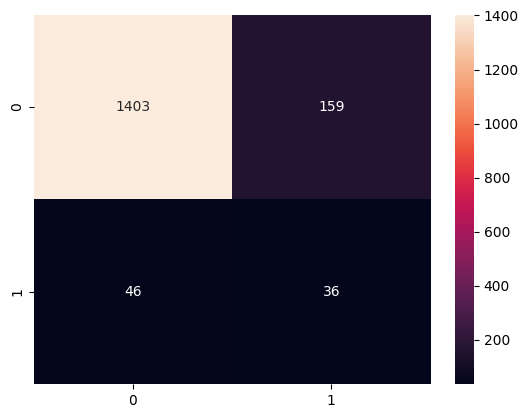

In [34]:
print("Metriche Test Set")

y_hat_test = logistic_cv.predict(X_test)
print(f"Accuracy sul Test Set: {accuracy_score(y_test, y_hat_test)}")
print(f"F1 Score sul Test Set: {f1_score(y_test, y_hat_test, zero_division=0)}")
print(f"Classification Report sul Test Set:\n{classification_report(y_test, y_hat_test, zero_division=0)}")

conf_matrix = confusion_matrix(y_test, y_hat_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

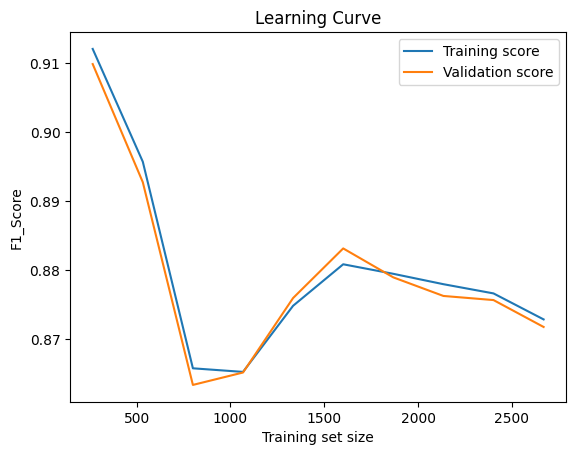

In [35]:
from sklearn.model_selection import learning_curve

# Create a learning curve for the Logistic Regression model
train_sizes, train_scores, val_scores = learning_curve(estimator=logistic_cv.best_estimator_,  # Use the best estimator found by GridSearchCV
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot of the learning curve compared with the training set size
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('F1_Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [36]:
# from sklearn.model_selection import validation_curve

# # Create a range of values for the parameter C to test
# C_values = np.logspace(-3, 3, 20)

# # Calculate the validation curve for the Logistic Regression model
# train_scores, test_scores = validation_curve(
#     estimator=LogisticRegression(),
#     X=X_train,
#     y=y_train,
#     param_name="C",
#     param_range=C_values,
#     cv=5,
#     scoring="f1",
#     n_jobs=-1
# )

# # Calcolare le medie dei punteggi di addestramento e di validazione
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# # Plot della curva di validazione
# plt.plot(C_values, train_scores_mean, label='Training score')
# plt.plot(C_values, test_scores_mean, label='Cross-validation score')
# plt.xscale('log')
# plt.xlabel('C')
# plt.ylabel('Score')
# plt.title('Validation Curve')
# plt.legend()
# plt.show()


### SVM

In [37]:
# from sklearn.svm import SVC

# estimator = SVC() # Create a Support Vector Machine model


# parameters = [ 
#               { 'C':[1, 10, 100, 1000],    # Regularization parameter C=1/lambda in range [1, 10, 100, 1000]
#                 'kernel':['linear'],        # Linear kernel
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99
 
#               },

#               { 'C':[1, 10, 100, 1000],
#                 'kernel':['rbf'],           # Radial Basis Function kernel
#                 'gamma': ['scale', 'auto', *[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]],
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99

#               },

#               { 'C':[1, 10, 100, 1000],
#                 'kernel':['poly'],          # Polynomial kernel
#                 'degree': [2,3,4],          # Degree of the polynomial kernel
#                 'gamma': ['scale', 'auto', *[0.01, 0.02, 0.03, 0.04, 0.05]],   # Kernel coefficient for 'poly' kernel
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99

#               }
#               ]

# svm_cv = GridSearchCV(estimator = estimator,
#                            param_grid = parameters,
#                            scoring = 'f1',
#                            cv = 5,
#                            n_jobs=-1,        # Use all processors
#                            verbose = 10)     # Print the progress

# svm_cv.fit(X_train, y_train)  # Train the model with the training set

# print('GridSearch CV best score : {:.4f}'.format(svm_cv.best_score_))
# print('Best parameters :', (svm_cv.best_params_))

# print('\nMetrics on the Training Set\n')
# y_hat_train_svm = svm_cv.predict(X_train)
# print(f"Accuracy score on the Training Set: {accuracy_score(y_train, y_hat_train_svm)}")
# print(f"F1 Score on the Training Set: {f1_score(y_train, y_hat_train_svm, zero_division=0)}")
# print(f"Classification Report on the Training Set:\n{classification_report(y_train, y_hat_train_svm, zero_division=0)}")

In [38]:
# print('Metrics Test Set\n')
# y_hat_test_svm = svm_cv.predict(X_test)
# print(f"Accuracy score on the Test Set: {accuracy_score(y_test, y_hat_test_svm)}")
# print(f"F1 Score on the Test Set: {f1_score(y_test, y_hat_test_svm, zero_division=0)}")
# print(f"Classification Report on the Test Set:{classification_report(y_test, y_hat_test_svm, zero_division=0)}")

# conf_matrix = confusion_matrix(y_test, y_hat_test_svm)
# sns.heatmap(conf_matrix, annot=True, fmt='d')
# plt.show()

In [39]:
# from sklearn.model_selection import learning_curve

# # Create a learning curve for the Logistic Regression model
# train_sizes, train_scores, val_scores = learning_curve(estimator= svm_cv.best_estimator_,  # Use the best estimator found by GridSearchCV
#                                                         X=X_train, 
#                                                         y=y_train, 
#                                                         train_sizes=np.linspace(0.1, 1.0, 10),
#                                                         cv=5)

# # Calculate the mean and standard deviation of the training and test scores
# train_scores_mean = np.mean(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)

# # Plot of the learning curve compared with the training set size
# plt.plot(train_sizes, train_scores_mean, label='Training score')
# plt.plot(train_sizes, val_scores_mean, label='Validation score')
# plt.xlabel('Training set size')
# plt.ylabel('F1_Score')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()


### Neural Network

In [40]:
# import numpy as np
# import pandas as pd
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, classification_report


# # Definizione del Modello e dei Parametri di Grid Search
# mlp_gs = MLPClassifier(max_iter=500, early_stopping=True)
# parameters = {
#     'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],
#     'learning_rate': ["constant", "adaptive", "invscaling"],
#     'activation': ['relu', 'tanh'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.01, 0.1, 1.0, 10.0],
#     'n_iter_no_change': [5, 10, 20]
# }

# # Definizione e Esecuzione di GridSearchCV
# nn_cv = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5, scoring='f1', verbose=10, return_train_score=True)
# nn_cv.fit(X_train, y_train)

# # Stampa dei Risultati della Grid Search
# print('GridSearch CV best score : {:.4f}'.format(nn_cv.best_score_))
# print('Parametri migliori :', (nn_cv.best_params_))

# # Predizioni e Valutazione sul Set di Addestramento
# y_hat_train = nn_cv.predict(X_train)

# print("Metriche TRAINING SET\n")
# print(f"Accuracy score on the TRAINING SET: {accuracy_score(y_train, y_hat_train)}")
# print(f"F1 Score on the TRAINING SET: {f1_score(y_train, y_hat_train, zero_division=0)}")
# print(f"Classification Report on the TRAINING SET:\n{classification_report(y_train, y_hat_train, zero_division=0)}")

# # Monitoraggio delle Metriche di Validazione
# results = pd.DataFrame(nn_cv.cv_results_)
# print(results[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']])


In [41]:
# print("Metriche TEST SET\n")
# y_hat_test = nn_cv.predict(X_test)
# print(f"Accuracy score on the TEST SET: {accuracy_score(y_test, y_hat_test)}")
# print(f"F1 Score on the TEST SET: {f1_score(y_test, y_hat_test, zero_division=0)}")
# print(f"Classification Report on the TEST SET:\n{classification_report(y_test, y_hat_test, zero_division=0)}")

# conf_matrix = confusion_matrix(y_test, y_hat_test)
# sns.heatmap(conf_matrix, annot=True, fmt='d')
# plt.show()

### Balance the Dataset 

In [42]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Count the number of classes in the original training set
print("Count the number of classes in the original training set")
print(Counter(y_train))

# Apply the Random Over Sampling technique
ro=RandomOverSampler()
X_train_resampled, y_train_resampled = ro.fit_resample(X_train,y_train)

# Count the number of classes in the new training set
print("Count the number of classes in the new training set")
print(Counter(y_train_resampled))
print(Counter(y_test))

Count the number of classes in the original training set
Counter({0: 3171, 1: 166})
Count the number of classes in the new training set
Counter({0: 3171, 1: 3171})
Counter({0: 1562, 1: 82})


In [43]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Before SMOTE
# # Count the number of classes in the original training set
# print("Count the number of classes in the original training set")
# print(Counter(y_train))

# # Calculate the number of samples to generate for the minority class (class 1)
# minority_class_samples = int(0.2 * len(y_train))  # Assuming the minority class is labeled as 1

# # Balance only the training set using SMOTE with a custom sampling strategy
# smote = SMOTE(sampling_strategy={1: minority_class_samples}, random_state=42)  
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # After SMOTE
# # Count the number of classes in the new training set
# print("Count the number of classes in the new training set")
# print(Counter(y_train_resampled))
# print(Counter(y_test))

In [44]:
# # Use the Synthetic Minority Over-sampling Technique(SMOTE) to balance the dataset

# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Before SMOTE
# # Count the number of classes in the original training set
# print("Count the number of classes in the original training set")
# print(Counter(y_train))

# # Balance only the training set using SMOTE
# smote = SMOTE(random_state=42)  
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # After SMOTE
# # Count the number of classes in the new training set
# print("Count the number of classes in the new training set")
# print(Counter(y_train_resampled))
# print(Counter(y_test))


### KNN with Balanced Set

In [45]:
# Define the hyperparameters range and estimator
k_values = range(1, 20)

hyper_parameters = {
    'n_neighbors': k_values,                            # Number of neighbors to use
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],     # Algorithm used to compute the nearest neighbors
    'p': [1,2],                                         # Power parameter of the distance metric (1: Manhattan, 2: Euclidean)
    'weights': ['uniform', 'distance']                  # Weight function used in prediction (uniform: all points in each neighborhood are weighted equally, distance: closer neighbors of a query point will have a greater influence than neighbors which are further away)
}

# Create a K-NN classifier for estimating the best hyperparameters
estimator = KNeighborsClassifier()

# Create a GridSearchCV object for hyperparameter tuning
knn_cv = GridSearchCV(estimator, 
                      hyper_parameters, 
                      cv=5, 
                      scoring='f1',
                      n_jobs=-1,        # Use all processors to train the model
                      verbose = 10)     # Print the progress of the cross validation process

# Perform Grid Search Cross Validation on the resampled training set
knn_cv.fit(X_train_resampled, y_train_resampled)
 
# Make predictions on the training set
y_hat_train_resempled_knn = knn_cv.predict(X_train_resampled)

# Evaluate model performance on the training set
print(f"F1 Score on Training Set: {f1_score(y_train_resampled, y_hat_train_resempled_knn)}")
print(f"Accuracy Score on Training Set: {accuracy_score(y_train_resampled, y_hat_train_resempled_knn)}")
print(f"Classification Report on the Training Set:\n{classification_report(y_train_resampled, y_hat_train_resempled_knn, zero_division=0)}")

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
F1 Score on Training Set: 1.0
Accuracy Score on Training Set: 1.0
Classification Report on the Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3171
           1       1.00      1.00      1.00      3171

    accuracy                           1.00      6342
   macro avg       1.00      1.00      1.00      6342
weighted avg       1.00      1.00      1.00      6342



Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
F1 Score on Test Set: 0.15483870967741933
Accuracy Score on Test Set: 0.920316301703163
Classification Report on the Test Set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1562
           1       0.16      0.15      0.15        82

    accuracy                           0.92      1644
   macro avg       0.56      0.55      0.56      1644
weighted avg       0.92      0.92      0.92      1644



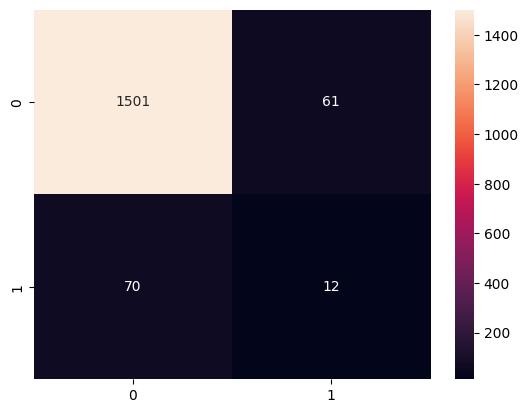

In [46]:
# Make predictions on the test set
y_hat_test_resampled_knn = knn_cv.predict(X_test)

# Print best parameters found by GridSearchCV
print(f"Best parameters: {knn_cv.best_params_}")

# Evaluate model performance on the test set
print(f"F1 Score on Test Set: {f1_score(y_test, y_hat_test_resampled_knn)}")
print(f"Accuracy Score on Test Set: {accuracy_score(y_test, y_hat_test_resampled_knn)}")
print(f"Classification Report on the Test Set:\n{classification_report(y_test,y_hat_test_resampled_knn, zero_division=0)}")

# Generate confusion matrix and visualize it
conf_matrix = confusion_matrix(y_test, y_hat_test_resampled_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

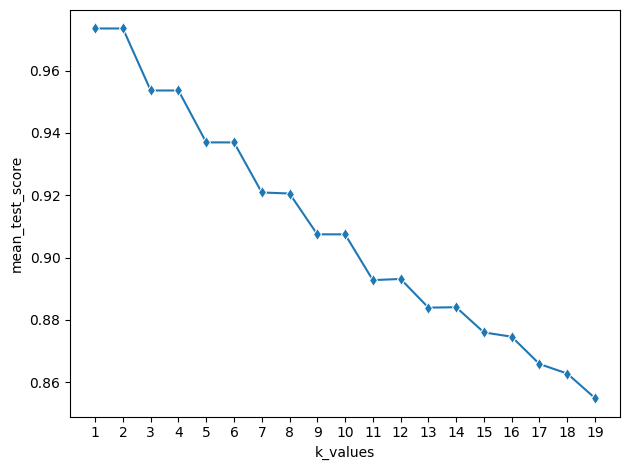

In [47]:
# Convert the results of the GridSearchCV to a DataFrame
scores = pd.DataFrame(knn_cv.cv_results_)  

# Create a new DataFrame to store the hyperparameters
ddf = pd.DataFrame(columns=['n_neighbors', 'p', 'weights', 'algorithm']) 

# Extract the hyperparameters from the 'params' column
for (i,r) in scores.iterrows():
    e = r['params']
    ddf.loc[i] = [e['n_neighbors'], e['p'], e['weights'], e['algorithm']]

# Concatenate the two dataframes
scores = pd.concat( [scores, ddf], axis=1)              
scores = scores[ scores['p'] == 1]                      # Select the scores with p = 1 
scores = scores[ scores['weights'] == 'uniform']        # Select the scores with weights = 'uniform'
scores = scores[ scores['algorithm'] == 'ball_tree']    # Select the scores with algorithm = 'ball_tree'
scores.mean_test_score

# Plot the F1 score for different values of k
sns.lineplot(x=k_values, y=scores.mean_test_score, marker='d') 
plt.xticks(k_values) # Set the x-ticks to be the k-values
plt.xlabel('k_values') # Set the x-label to be 'k-values'
plt.tight_layout()
plt.show()

### Logistic Regression with Balanced Set

In [48]:
# Create a Logistic Regression model
estimator = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object for hyperparameter tuning
hyper_parameters = [ 

    {
    'C': np.logspace(-3, 3, 20),   # C=1/lambda, regularization parameter, sequence uniform distributed beteween 10^-3 and 10^3
    'penalty': ['l1'],             # L1 regularization
    'solver':  [ 'liblinear'],     # Optimization algorithm, 'liblinear' is used for logistic regression with L1 regularization
    'class_weight':  [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 200)] ] # linspace generates 200 values between 0 and 0.99

    },

    {
        'C':  np.logspace(-3, 3, 20),
        'penalty': ['l2'],                       # L2 regularization
        'solver': ['newton-cg', 'lbfgs', 'sag'], # Optimization algorithm, 'newton-cg', 'lbfgs', 'sag' are used for logistic regression with L2 regularization
        "class_weight": [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 200)] ] # linspace generates 200 values between 0 and 0.99

    }
]

# Create a GridSearchCV object for hyperparameter tuning
logistic_cv = GridSearchCV(estimator, 
                           hyper_parameters, 
                           cv=5, 
                           scoring='f1',
                           n_jobs=-1,        # Use all processors to train the model
                           verbose = 10)     # Print the progress of the cross validation process

logistic_cv.fit(X_train_resampled, y_train_resampled)

print('GridSearch CV best score : {:.4f}'.format(logistic_cv.best_score_))
print(f"Best paramenters: {logistic_cv.best_params_}")

y_hat_train_resempled_logreg = logistic_cv.predict(X_train_resampled)

print("\nMetrics Training Set \n")

print(f"Accuracy on Training Set: {accuracy_score(y_train_resampled, y_hat_train_resempled_logreg)}")
print(f"F1 Score on Training Set: {f1_score(y_train_resampled, y_hat_train_resempled_logreg, zero_division=0)}")
print(f"Classification Report on the Training Set:\n{classification_report(y_train_resampled, y_hat_train_resempled_logreg, zero_division=0)}")

Fitting 5 folds for each of 16160 candidates, totalling 80800 fits
GridSearch CV best score : 0.8064
Best paramenters: {'C': 0.6951927961775606, 'class_weight': {0: 0.36316582914572865, 1: 0.6368341708542713}, 'penalty': 'l1', 'solver': 'liblinear'}

Metrics Training Set 

Accuracy on Training Set: 0.7812992746767581
F1 Score on Training Set: 0.8069589422407795
Classification Report on the Training Set:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      3171
           1       0.72      0.91      0.81      3171

    accuracy                           0.78      6342
   macro avg       0.80      0.78      0.78      6342
weighted avg       0.80      0.78      0.78      6342



Metriche Test Set
Accuracy sul Test Set: 0.6843065693430657
F1 Score sul Test Set: 0.21482602118003025
Classification Report sul Test Set:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1562
           1       0.12      0.87      0.21        82

    accuracy                           0.68      1644
   macro avg       0.56      0.77      0.51      1644
weighted avg       0.95      0.68      0.77      1644



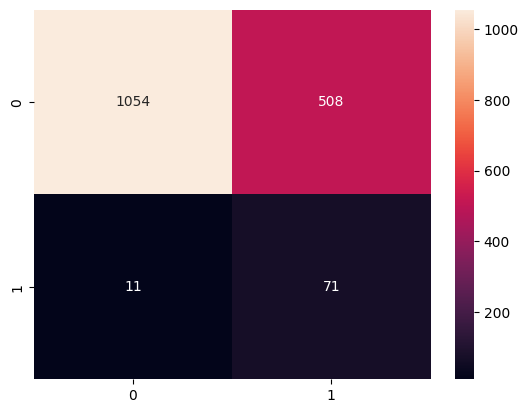

In [49]:
print("Metriche Test Set")

y_hat_test_resampled_logreg = logistic_cv.predict(X_test)
print(f"Accuracy sul Test Set: {accuracy_score(y_test, y_hat_test_resampled_logreg)}")
print(f"F1 Score sul Test Set: {f1_score(y_test, y_hat_test_resampled_logreg, zero_division=0)}")
print(f"Classification Report sul Test Set:\n{classification_report(y_test, y_hat_test_resampled_logreg, zero_division=0)}")

conf_matrix = confusion_matrix(y_test, y_hat_test_resampled_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

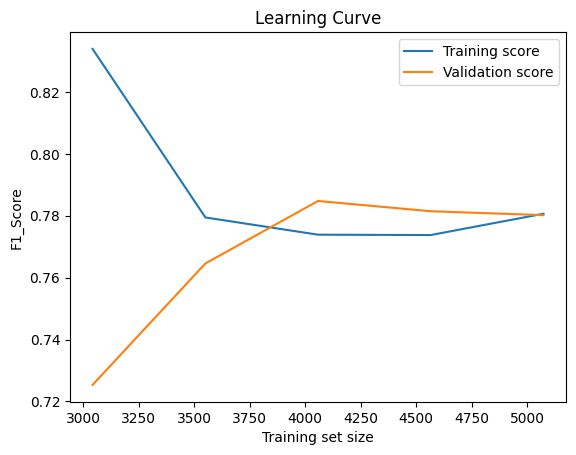

In [50]:
from sklearn.model_selection import learning_curve

# Define the range of training set sizes 
train_sizes, train_scores, test_scores = learning_curve(estimator=logistic_cv.best_estimator_, 
                                                        X=X_train_resampled, 
                                                        y=y_train_resampled, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=5)

# Calculate the mean of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1) # Mean of the training scores
test_scores_mean = np.mean(test_scores, axis=1)   # Mean of the test scores

# Plot of the learning curve compared with the training set size
plt.plot(train_sizes, train_scores_mean, label='Training score')    # Plot the training score mean respect to the training set size
plt.plot(train_sizes, test_scores_mean, label='Validation score')   # Plot the validation score mean respect to the training set size
plt.xlabel('Training set size')
plt.ylabel('F1_Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


### SVM with balanced set

In [51]:
# from sklearn.svm import SVC

# estimator = SVC()

# parameters = [ 
#                 {'C':[1, 10, 100, 1000],    # Regularization parameter C=1/lambda in range [1, 10, 100, 1000]
#                 'kernel':['linear'],        # Linear kernel
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99

#                 }, 

#                {'C':[1, 10, 100, 1000],
#                 'kernel':['rbf'],           # Radial Basis Function kernel
#                 'gamma': ['scale', 'auto', *[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]],
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99

#                 },

#                {'C':[1, 10, 100, 1000],
#                 'kernel':['poly'],          # Polynomial kernel
#                 'degree': [2,3,4],          # Degree of the polynomial kernel
#                 'gamma': ['scale', 'auto', *[0.01, 0.02, 0.03, 0.04, 0.05]],   # Kernel coefficient for 'poly' kernel
#                 'class_weight': [None, 'balanced', *[{0: i, 1: 1.0-i} for i in np.linspace(0.0, 0.99, 10)] ] # linspace generates 200 values between 0 and 0.99

#                 }
#               ]

# svm_cv = GridSearchCV(estimator = estimator,
#                            param_grid = parameters,
#                            scoring = 'f1',
#                            cv = 5,
#                            n_jobs=-1,        # Use all processors
#                            verbose = 10)     # Print the progress

# svm_cv.fit(X_train_resampled, y_train_resampled) # Train the model with the training set resampled

# print('GridSearch CV best score : {:.4f}'.format(svm_cv.best_score_))
# print('Best parameters :', (svm_cv.best_params_))

# print('\nMetrics on the Training Set\n')
# y_hat_train_resempled_svm = svm_cv.predict(X_train_resampled)

# print(f"Accuracy score on the Training Set: {accuracy_score(y_train_resampled, y_hat_train_resempled_svm)}")
# print(f"F1 Score on the Training Set: {f1_score(y_train_resampled, y_hat_train_resempled_svm, zero_division=0)}")
# print(f"Classification Report on the Training Set:\n{classification_report(y_train_resampled, y_hat_train_resempled_svm, zero_division=0)}")

In [52]:
# print('Metrics Test Set\n')
# y_hat_test_resempled_svm = svm_cv.predict(X_test)
# print(f"Accuracy score on the Test Set: {accuracy_score(y_test, y_hat_test_resempled_svm)}")
# print(f"F1 Score on the Test Set: {f1_score(y_test, y_hat_test_resempled_svm, zero_division=0)}")
# print(f"Classification Report on the Test Set:{classification_report(y_test, y_hat_test_resempled_svm, zero_division=0)}")

# conf_matrix = confusion_matrix(y_test, y_hat_test_resempled_svm)
# sns.heatmap(conf_matrix, annot=True, fmt='d')
# plt.show()

In [53]:
# from sklearn.model_selection import learning_curve

# # Create a learning curve for the Logistic Regression model
# train_sizes, train_scores, val_scores = learning_curve(estimator=svm_cv.best_estimator_,  # Use the best estimator found by GridSearchCV
#                                                         X=X_train_resampled, 
#                                                         y=y_train_resampled, 
#                                                         train_sizes=np.linspace(0.1, 1.0, 10),
#                                                         cv=5)

# # Calculate the mean and standard deviation of the training and test scores
# train_scores_mean = np.mean(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)

# # Plot of the learning curve compared with the training set size
# plt.plot(train_sizes, train_scores_mean, label='Training score')
# plt.plot(train_sizes, val_scores_mean, label='Validation score')
# plt.xlabel('Training set size')
# plt.ylabel('F1_Score')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()


### Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Definizione del Modello e dei Parametri di Grid Search
mlp_gs = MLPClassifier(max_iter=100, early_stopping=True, n_iter_no_change=10)
parameters = {
    'hidden_layer_sizes': [(20,), (100, 100), (200, 200), (100, 100, 1000)],
    'learning_rate': ["constant", "invscaling", "adaptive"],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.005]
}

# Definizione e Esecuzione di GridSearchCV
nn_cv = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5, scoring='f1', verbose=10, return_train_score=True)
nn_cv.fit(X_train_resampled, y_train_resampled)

# Stampa dei Risultati della Grid Search
print('GridSearch CV best score : {:.4f}'.format(nn_cv.best_score_))
print('Parametri migliori :', (nn_cv.best_params_))

# Predizioni e Valutazione sul Set di Addestramento
y_hat_train_resempled_NN = nn_cv.predict(X_train_resampled)

print("Metriche TRAINING SET\n")
print(f"Accuracy score on the TRAINING SET: {accuracy_score(y_train_resampled, y_hat_train_resempled_NN)}")
print(f"F1 Score on the TRAINING SET: {f1_score(y_train_resampled, y_hat_train_resempled_NN, zero_division=0)}")
print(f"Classification Report on the TRAINING SET:\n{classification_report(y_train_resampled, y_hat_train_resempled_knn, zero_division=0)}")

# Monitoraggio delle Metriche di Validazione
results = pd.DataFrame(nn_cv.cv_results_)
print(results[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']])


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearch CV best score : 0.9708
Parametri migliori : {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}
Metriche TRAINING SET

Accuracy score on the TRAINING SET: 0.9853358561967833
F1 Score on the TRAINING SET: 0.9855477855477855
Classification Report on the TRAINING SET:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3171
           1       1.00      1.00      1.00      3171

    accuracy                           1.00      6342
   macro avg       1.00      1.00      1.00      6342
weighted avg       1.00      1.00      1.00      6342

     mean_test_score  std_test_score  mean_train_score  std_train_score
0           0.777848        0.007045          0.777928         0.011621
1           0.818298        0.030116          0.821439         0.036446
2           0.410830        0.125256          0

Metriche TEST SET

Accuracy score on the TEST SET: 0.9002433090024331
F1 Score on the TEST SET: 0.11827956989247312
Classification Report on the TEST SET:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1562
           1       0.18      0.44      0.26        82

    accuracy                           0.88      1644
   macro avg       0.58      0.67      0.60      1644
weighted avg       0.93      0.88      0.90      1644



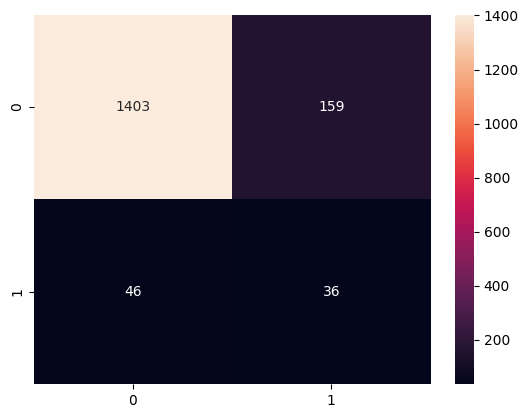

In [55]:
print("Metriche TEST SET\n")
y_hat_test_resampled_NN = nn_cv.predict(X_test)
print(f"Accuracy score on the TEST SET: {accuracy_score(y_test, y_hat_test_resampled_NN)}")
print(f"F1 Score on the TEST SET: {f1_score(y_test, y_hat_test_resampled_NN, zero_division=0)}")
print(f"Classification Report on the TEST SET:\n{classification_report(y_test, y_hat_test, zero_division=0)}")

conf_matrix = confusion_matrix(y_test, y_hat_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()